<a href="https://colab.research.google.com/github/ZnFn/ML-mini-projects/blob/main/Machine_Translation_(ENG_FR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Translation Using a Seq2Seq Architecture

---
The goal of this colab is to get you more familiar with the Seq2Seq models and their challenges. For this reason, you will be working on machine translation problem where we would have a sentence as input (in english), and the output is gonna be the translated sentence (in french). So just like what happens with Google Translate.


**Just to give you a heads up:** We won't be having a model performing like Google translate, but at least we will have an idea about how Google Translate works and the challenges that exist with a translation problem.  

## Importing Libraries

We start by importing numpy and pandas and then we can add the rest

In [ ]:
import pandas as pd
import numpy as np

We clone the github repository where our data exists. Here is the link: https://github.com/zaka-ai/machine_learning_certification/tree/main/Challenge%207 

## Getting the data

In [ ]:
!git clone https://github.com/zaka-ai/machine_learning_certification

Cloning into 'machine_learning_certification'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 10), reused 10 (delta 1), pack-reused 0
Unpacking objects: 100% (43/43), done.


In [ ]:
%cd /content/machine_learning_certification/Challenge 7

/content/machine_learning_certification/Challenge 7


We read the english sentences in a dataframe named "english", and the french sentences in a dataframe named "french"

In [ ]:
english = pd.read_csv('en.csv', header = None)
english.head()

,0
0,"new jersey is sometimes quiet during autumn , ..."
1,the united states is usually chilly during jul...
2,"california is usually quiet during march , and..."
3,the united states is sometimes mild during jun...
4,"your least liked fruit is the grape , but my l..."


In [ ]:
french = pd.read_csv('fr.csv', header = None)
french.head()

,0
0,new jersey est parfois calme pendant l' automn...
1,les états-unis est généralement froid en juill...
2,"california est généralement calme en mars , et..."
3,"les états-unis est parfois légère en juin , et..."
4,"votre moins aimé fruit est le raisin , mais mo..."


**How many sentences does each of the files contain?**

In [ ]:
print("We have {} english sentences and {} french sentences".format(len(english), len(french)))

We have 137860 english sentences and 137860 french sentences


Now let us concatenate the 2 dataframes into one dataframe that we call **df** where one column has the english senetnces and the other has the french sentences

In [ ]:
df = pd.concat([english, french], axis=1)
df.head()

,0,0
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


Let's name the columns as **English** and **French** so that we access them easier.

In [ ]:
df.columns = ['English', 'French']
df.head()

,English,French
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


Pick a sentence and print it in both languages

In [ ]:
print("English:", df['English'][2])
print("French:", df['French'][2])

English: california is usually quiet during march , and it is usually hot in june .
French: california est généralement calme en mars , et il est généralement chaud en juin .


##Cleaning Data

The data that we have is almost clean as we can see, we just need to remove the punctuations inside of it.

In [ ]:
import regex as re

def remove_punctuation(text):
  return re.sub(r'[.!?:;,]', '', text)

In [ ]:
df['English'] = df['English'].apply(lambda x: remove_punctuation(x))
df['French'] = df['French'].apply(lambda x: remove_punctuation(x))

Make sure that the punctuation is removed by printing the example that you printed earlier.

In [ ]:
print("English:", df['English'][2])
print("French:", df['French'][2])

English: california is usually quiet during march  and it is usually hot in june 
French: california est généralement calme en mars  et il est généralement chaud en juin 


##Exploring the Data

Add a column **ENG Length** to the dataset that shows how many words does a sentence contain, and do the same for french in a column called **FR Length**

In [ ]:
df["ENG Length"] = df["English"].apply(lambda x: len(x.split()))
df.head()

,English,French,ENG Length
0,new jersey is sometimes quiet during autumn a...,new jersey est parfois calme pendant l' automn...,13
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...,15
2,california is usually quiet during march and ...,california est généralement calme en mars et ...,13
3,the united states is sometimes mild during jun...,les états-unis est parfois légère en juin et ...,14
4,your least liked fruit is the grape but my le...,votre moins aimé fruit est le raisin mais mon...,14


In [ ]:
df["FR Length"] = df["French"].apply(lambda x: len(x.split()))
df.head()

,English,French,ENG Length,FR Length
0,new jersey is sometimes quiet during autumn a...,new jersey est parfois calme pendant l' automn...,13,14
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...,15,13
2,california is usually quiet during march and ...,california est généralement calme en mars et ...,13,13
3,the united states is sometimes mild during jun...,les états-unis est parfois légère en juin et ...,14,13
4,your least liked fruit is the grape but my le...,votre moins aimé fruit est le raisin mais mon...,14,14


Visualize the distribution of the lengths of english sentences and french sentences.

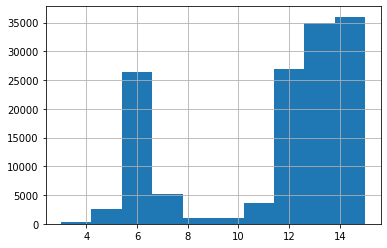

In [ ]:
df["ENG Length"].hist()

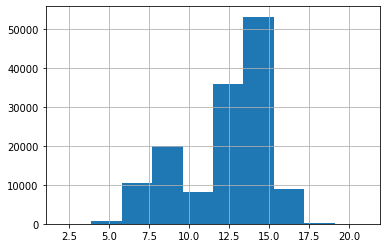

In [ ]:
df["FR Length"].hist()

Get the maximum length of an english sentence and the maximum length of a french sentence. 

In [ ]:
max_eng = max(df["ENG Length"])
max_fr = max(df["FR Length"])

print("The longest english sentence is made of {} words and the longest french sentence is made of {} words".format(max_eng, max_fr))

The longest english sentence is made of 15 words and the longest french sentence is made of 21 words


##Preprocessing the Data

In order for the data to be fed to the model, it has to be tokenized and padded. 

**To tokenize english and french sentences, we can use only one tokenizer. True or False?**

False, because each tokenizer will be dealing with a specific dictionary of a specific languages.

Tokenize the sentences that we have.

In [ ]:
from keras.preprocessing.text import Tokenizer

eng_tokenizer = Tokenizer()
eng_tokenizer.fit_on_texts(df['English'])

fr_tokenizer = Tokenizer()
fr_tokenizer.fit_on_texts(df['French'])

In [ ]:
fr_tokenized = fr_tokenizer.texts_to_sequences(df['French'])
eng_tokenized = eng_tokenizer.texts_to_sequences(df['English'])

**How many unique words do we have in english and in french?**

In [ ]:
eng_vocab_size = len(eng_tokenizer.word_index)
fr_vocab_size = len(fr_tokenizer.word_index)

print("We have {} english words and {} french words".format(eng_vocab_size, fr_vocab_size))

We have 199 english words and 344 french words


**What should be the length of the sequences that we have after padding?**

The english sentences will have 15 words and the french ones will have 21 words.

Perform padding on the sequences that we have.

In [ ]:
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences

fr_tokenized_padded = pad_sequences(fr_tokenized, maxlen = max_fr, padding='post')
eng_tokenized_padded = pad_sequences(eng_tokenized, maxlen = max_eng, padding='post')

##Modeling

After preprrocessing the data, we can build our model. Start by building a baseline architecture relying on RNNs, LSTMs, or GRUs. It will be good to lookup how to build Seq2Seq models, there are some new layers that will help you.

In [ ]:
from keras.layers import Dense, LSTM, GRU, Embedding, RepeatVector, Input, TimeDistributed, Bidirectional
from keras.models import Sequential

model = Sequential()

model.add(Embedding(eng_vocab_size+1, 100, input_length=max_eng))
model.add(GRU(20))
model.add(RepeatVector(max_fr))
model.add(GRU(20, return_sequences=True))
model.add(TimeDistributed(Dense(fr_vocab_size+1, activation="softmax")))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           20000     
                                                                 
 gru (GRU)                   (None, 20)                7320      
                                                                 
 repeat_vector (RepeatVector  (None, 21, 20)           0         
 )                                                               
                                                                 
 gru_1 (GRU)                 (None, 21, 20)            2520      
                                                                 
 time_distributed (TimeDistr  (None, 21, 345)          7245      
 ibuted)                                                         
                                                                 
Total params: 37,085
Trainable params: 37,085
Non-traina

Compile and train the model.

We use sparse categorical crossentropy because we did not one hot encode our output.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x = eng_tokenized_padded, y=fr_tokenized_padded, validation_split=0.2, epochs = 25, batch_size=64)

Epoch 1/25
1724/1724 [==============================] - 85s 47ms/step - loss: 2.6247 - accuracy: 0.4636 - val_loss: 2.0194 - val_accuracy: 0.5007
Epoch 2/25
1724/1724 [==============================] - 98s 57ms/step - loss: 1.8814 - accuracy: 0.5199 - val_loss: 1.7812 - val_accuracy: 0.5425
Epoch 3/25
1724/1724 [==============================] - 90s 52ms/step - loss: 1.6734 - accuracy: 0.5665 - val_loss: 1.5542 - val_accuracy: 0.5886
Epoch 4/25
1724/1724 [==============================] - 78s 45ms/step - loss: 1.4627 - accuracy: 0.6102 - val_loss: 1.4008 - val_accuracy: 0.6231
Epoch 5/25
1724/1724 [==============================] - 79s 46ms/step - loss: 1.3550 - accuracy: 0.6355 - val_loss: 1.3060 - val_accuracy: 0.6455
Epoch 6/25
1724/1724 [==============================] - 79s 46ms/step - loss: 1.2661 - accuracy: 0.6526 - val_loss: 1.2257 - val_accuracy: 0.6617
Epoch 7/25
1724/1724 [==============================] - 80s 46ms/step - loss: 1.1947 - accuracy: 0.6674 - val_loss: 1.1685 -

We can do one hot encoding and use categorical cross entropy instead

In [ ]:
from keras.utils import np_utils
fr_tokenized_padded_encoded = np_utils.to_categorical(fr_tokenized_padded)

In [ ]:
model_new = Sequential()

model_new.add(Embedding(eng_vocab_size+1, 100, input_length=max_eng))
model_new.add(GRU(20))
model_new.add(RepeatVector(max_fr))
model_new.add(GRU(20, return_sequences=True))
model_new.add(TimeDistributed(Dense(fr_vocab_size+1, activation="softmax")))

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 100)           20000     
                                                                 
 gru_2 (GRU)                 (None, 20)                7320      
                                                                 
 repeat_vector_1 (RepeatVect  (None, 21, 20)           0         
 or)                                                             
                                                                 
 gru_3 (GRU)                 (None, 21, 20)            2520      
                                                                 
 time_distributed_1 (TimeDis  (None, 21, 345)          7245      
 tributed)                                                       
                                                                 
Total params: 37,085
Trainable params: 37,085
Non-trai

In [ ]:
model_new.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_new.fit(x = eng_tokenized_padded, y=fr_tokenized_padded_encoded, validation_split=0.2, epochs = 25, batch_size=64)

Epoch 1/25
1724/1724 [==============================] - 268s 153ms/step - loss: 2.6046 - accuracy: 0.4707 - val_loss: 1.9905 - val_accuracy: 0.5082
Epoch 2/25
1724/1724 [==============================] - 255s 148ms/step - loss: 1.7409 - accuracy: 0.5594 - val_loss: 1.5542 - val_accuracy: 0.5967
Epoch 3/25
1724/1724 [==============================] - 276s 160ms/step - loss: 1.4516 - accuracy: 0.6149 - val_loss: 1.3751 - val_accuracy: 0.6319
Epoch 4/25
1724/1724 [==============================] - 256s 148ms/step - loss: 1.3203 - accuracy: 0.6451 - val_loss: 1.2679 - val_accuracy: 0.6584
Epoch 5/25
1724/1724 [==============================] - 243s 141ms/step - loss: 1.2295 - accuracy: 0.6643 - val_loss: 1.2050 - val_accuracy: 0.6686
Epoch 6/25
1724/1724 [==============================] - 252s 146ms/step - loss: 1.1517 - accuracy: 0.6803 - val_loss: 1.1131 - val_accuracy: 0.6919
Epoch 7/25
1724/1724 [==============================] - 200s 116ms/step - loss: 1.0852 - accuracy: 0.6962 - val_

Define a function that gets an input sentence in english and gives the output sentence in the french language.

In [ ]:
def final_predictions_model1(sentence):
    
    y_id_to_word = {value: key for key, value in fr_tokenizer.word_index.items()}
    y_id_to_word[0] = '<PAD>'

    sentence = eng_tokenizer.texts_to_sequences([sentence])
    
    sentence = pad_sequences(sentence, maxlen=max_eng, padding='post')
    predictions = model_new.predict(sentence)

    print(' '.join([y_id_to_word[np.argmax(x)] for x in predictions[0]]))

Test the following sentence

In [ ]:
input = "she is driving the truck "

final_predictions_model1(input)

elle est de visiter jersey jersey en <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


Try to improve your model by modifying the architecture to take into account bidirectionality which is very useful in Machine Translation. Create a new model called model2

In [ ]:
model2 = Sequential()

model2.add(Embedding(eng_vocab_size+1, 100, input_length=max_eng))
model2.add(Bidirectional(GRU(20)))
model2.add(RepeatVector(max_fr))
model2.add(Bidirectional(GRU(20, return_sequences=True)))
model2.add(TimeDistributed(Dense(fr_vocab_size+1, activation="softmax")))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 100)           20000     
                                                                 
 bidirectional (Bidirectiona  (None, 40)               14640     
 l)                                                              
                                                                 
 repeat_vector_1 (RepeatVect  (None, 21, 40)           0         
 or)                                                             
                                                                 
 bidirectional_1 (Bidirectio  (None, 21, 40)           7440      
 nal)                                                            
                                                                 
 time_distributed_1 (TimeDis  (None, 21, 345)          14145     
 tributed)                                            

compile and train your new model.

In [ ]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model2.fit(x = eng_tokenized_padded, y=fr_tokenized_padded, validation_split=0.2, epochs = 25, batch_size=64)

Epoch 1/25
1724/1724 [==============================] - 61s 29ms/step - loss: 2.3552 - val_loss: 1.8635
Epoch 2/25
1724/1724 [==============================] - 48s 28ms/step - loss: 1.6339 - val_loss: 1.4445
Epoch 3/25
1724/1724 [==============================] - 48s 28ms/step - loss: 1.3337 - val_loss: 1.2444
Epoch 4/25
1724/1724 [==============================] - 48s 28ms/step - loss: 1.1437 - val_loss: 1.0622
Epoch 5/25
1724/1724 [==============================] - 48s 28ms/step - loss: 1.0014 - val_loss: 0.9574
Epoch 6/25
1724/1724 [==============================] - 48s 28ms/step - loss: 0.9103 - val_loss: 0.8689
Epoch 7/25
1724/1724 [==============================] - 48s 28ms/step - loss: 0.8431 - val_loss: 0.8202
Epoch 8/25
1724/1724 [==============================] - 48s 28ms/step - loss: 0.7883 - val_loss: 0.7616
Epoch 9/25
1724/1724 [==============================] - 48s 28ms/step - loss: 0.7406 - val_loss: 0.7299
Epoch 10/25
1724/1724 [==============================] - 48s 28m

Define a new function that relies on your new model to make predictions.

In [ ]:
def final_predictions_model2(sentence):
    
    y_id_to_word = {value: key for key, value in fr_tokenizer.word_index.items()}
    y_id_to_word[0] = '<PAD>'

    sentence = eng_tokenizer.texts_to_sequences([sentence])
    
    sentence = pad_sequences(sentence, maxlen=max_eng, padding='post')
    predictions = model2.predict(sentence)

    print(' '.join([y_id_to_word[np.argmax(x)] for x in predictions[0]]))

In [ ]:
input = "she is driving the truck"

final_predictions_model2(input)

elle conduit le nouveau camion noir <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


**What is another adjustment in terms of architecture that you might be able to do to improve your model?**

We can use the attention mechanism.

**What are some additional ways that we can do to improve the performance of our model?**

* Training for longer
* Getting more data
* Optimizing hyperparameters